In [1]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [2]:
model = Word2Vec.load("data/word2vec.model")

In [3]:
words = list(model.wv.index_to_key)
words[:6]

['dil', 'doğal', 'işle', 've', 'bir', 'yapay']

In [4]:
df_name = []
df_count = []

for i in words:
    df_name.append(i)
    df_count.append(model.wv.get_vecattr(i,"count"))
    
df = pd.DataFrame({"name":df_name, "count":df_count})
df.head()

,name,count
0,dil,962
1,doğal,823
2,işle,733
3,ve,585
4,bir,462


In [5]:
df.sort_values("count", ascending=False).head()

,name,count
0,dil,962
1,doğal,823
2,işle,733
3,ve,585
8,iç,497


In [6]:
df.index

RangeIndex(start=0, stop=11683, step=1)

In [7]:
model.wv.most_similar(["doğal"])

[('ve', 0.9995577335357666),
 ('bir', 0.9994933009147644),
 ('iç', 0.9994380474090576),
 ('dil', 0.9993947148323059),
 ('il', 0.9993585348129272),
 ('işle', 0.9993122220039368),
 ('çok', 0.9992936253547668),
 ('üzer', 0.9992810487747192),
 ('de', 0.9992621541023254),
 ('olarak', 0.9992578625679016)]

In [8]:
model.wv.most_similar(["dil"])

[('ve', 0.9995283484458923),
 ('bu', 0.9995202422142029),
 ('bir', 0.9995077252388),
 ('iç', 0.9994919300079346),
 ('il', 0.9994634985923767),
 ('doğal', 0.9993945956230164),
 ('da', 0.999359667301178),
 ('işle', 0.9993237853050232),
 ('de', 0.9992803931236267),
 ('ver', 0.9992408752441406)]

In [9]:
model.wv.most_similar(["işle"])

[('bir', 0.9995246529579163),
 ('iç', 0.9994776248931885),
 ('ve', 0.9994715452194214),
 ('dil', 0.9993239045143127),
 ('il', 0.9993131756782532),
 ('doğal', 0.9993124008178711),
 ('üzer', 0.9992566108703613),
 ('bu', 0.9992532730102539),
 ('olarak', 0.9991841316223145),
 ('zeka', 0.9991822242736816)]

In [10]:
model.wv.similarity("doğal","dil")

0.99939466

In [11]:
import numpy as np

In [12]:
arr = np.empty((0,100),dtype="f")
arr

array([], shape=(0, 100), dtype=float32)

In [13]:
word = "işle"
word_label = [word]
word_label

['işle']

In [14]:
close_words = model.wv.most_similar([word])
close_words

[('bir', 0.9995246529579163),
 ('iç', 0.9994776248931885),
 ('ve', 0.9994715452194214),
 ('dil', 0.9993239045143127),
 ('il', 0.9993131756782532),
 ('doğal', 0.9993124008178711),
 ('üzer', 0.9992566108703613),
 ('bu', 0.9992532730102539),
 ('olarak', 0.9991841316223145),
 ('zeka', 0.9991822242736816)]

In [15]:
arr = np.append(arr, np.array([model.wv.get_vector(word)]),axis=0)
arr

array([[-0.16589518,  0.2966204 ,  0.0574336 ,  0.00623281, -0.00683478,
        -0.39369786,  0.09495598,  0.6516804 , -0.19776839, -0.2629331 ,
        -0.13140044, -0.51837975, -0.04060796,  0.2117075 ,  0.0729306 ,
        -0.18450473,  0.15749665, -0.33532903, -0.03963795, -0.70703816,
         0.24590331,  0.19727564,  0.37636256, -0.05621397,  0.03658761,
         0.18066487, -0.17734256, -0.13929805, -0.26568162,  0.04268985,
         0.44405985, -0.03098401,  0.05572434, -0.3772439 , -0.03651062,
         0.37482592,  0.09627724, -0.02267893, -0.20999879, -0.31236032,
         0.19622597, -0.2051766 , -0.22460422, -0.05662978,  0.20084643,
        -0.23473854, -0.1951844 , -0.02719391,  0.12461647,  0.0693382 ,
         0.1441743 , -0.20211229, -0.08447383, -0.04629501, -0.12358589,
         0.13506334,  0.17386465, -0.01970623, -0.34171513, -0.07414442,
         0.03907995,  0.05216624,  0.10115667,  0.04412981, -0.3458181 ,
         0.3341367 ,  0.05497193,  0.24333987, -0.2

In [16]:
for word_score in close_words:
    wrd_vector = model.wv.get_vector(word_score[0])
    word_label.append(word_score[0])
    arr = np. append(arr, np.array([wrd_vector]),axis=0)

In [17]:
arr

array([[-0.16589518,  0.2966204 ,  0.0574336 , ..., -0.30575764,
        -0.00366517,  0.03782218],
       [-0.2327898 ,  0.39593348,  0.08010325, ..., -0.40621835,
        -0.01646367,  0.06469284],
       [-0.20874093,  0.35785538,  0.08084553, ..., -0.3547605 ,
        -0.01012003,  0.04885732],
       ...,
       [-0.16384506,  0.2728884 ,  0.05311952, ..., -0.28454366,
        -0.00390446,  0.0470442 ],
       [-0.15350749,  0.27739576,  0.0635958 , ..., -0.2839579 ,
        -0.00744911,  0.03467437],
       [-0.12715845,  0.23753726,  0.05273804, ..., -0.25855651,
        -0.01281273,  0.04295026]], dtype=float32)

In [18]:
len(arr)

11

In [19]:
arr[0]

array([-0.16589518,  0.2966204 ,  0.0574336 ,  0.00623281, -0.00683478,
       -0.39369786,  0.09495598,  0.6516804 , -0.19776839, -0.2629331 ,
       -0.13140044, -0.51837975, -0.04060796,  0.2117075 ,  0.0729306 ,
       -0.18450473,  0.15749665, -0.33532903, -0.03963795, -0.70703816,
        0.24590331,  0.19727564,  0.37636256, -0.05621397,  0.03658761,
        0.18066487, -0.17734256, -0.13929805, -0.26568162,  0.04268985,
        0.44405985, -0.03098401,  0.05572434, -0.3772439 , -0.03651062,
        0.37482592,  0.09627724, -0.02267893, -0.20999879, -0.31236032,
        0.19622597, -0.2051766 , -0.22460422, -0.05662978,  0.20084643,
       -0.23473854, -0.1951844 , -0.02719391,  0.12461647,  0.0693382 ,
        0.1441743 , -0.20211229, -0.08447383, -0.04629501, -0.12358589,
        0.13506334,  0.17386465, -0.01970623, -0.34171513, -0.07414442,
        0.03907995,  0.05216624,  0.10115667,  0.04412981, -0.3458181 ,
        0.3341367 ,  0.05497193,  0.24333987, -0.29423344,  0.31

In [20]:
tsne = TSNE(n_components=2, random_state=42,perplexity=3)
np.printoptions(suppress=True)
Y = tsne.fit_transform(arr)
Y

array([[   6.3046737,  -38.65472  ],
       [  37.00221  ,  121.81673  ],
       [  34.487442 ,   67.49847  ],
       [  55.935314 ,  135.5503   ],
       [  53.649822 ,  109.48873  ],
       [  15.160858 ,  -19.599442 ],
       [  35.882275 ,   49.194023 ],
       [ -24.54939  , -111.93194  ],
       [   9.17522  ,  -63.554745 ],
       [  -6.067877 ,  -76.17429  ],
       [  -5.1490135, -115.92694  ]], dtype=float32)

In [21]:
x_cords = Y[:,0]
x_cords

array([  6.3046737,  37.00221  ,  34.487442 ,  55.935314 ,  53.649822 ,
        15.160858 ,  35.882275 , -24.54939  ,   9.17522  ,  -6.067877 ,
        -5.1490135], dtype=float32)

In [22]:
word_label

['işle',
 'bir',
 'iç',
 've',
 'dil',
 'il',
 'doğal',
 'üzer',
 'bu',
 'olarak',
 'zeka']

In [36]:
import plotly.express as px 

In [37]:
fig = px.scatter(x=x_cords.tolist(), y=y_cords.tolist(),text=word_label,size_max= 100)

fig.update_layout(height=800,title_text="Word2Vec Most Similarity")

fig.show()

NameError: name 'y_cords' is not defined

In [28]:
!pip install wordcloud

  Using cached wordcloud-1.9.2-cp310-cp310-win_amd64.whl (152 kB)


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [39]:
len(words
)

11683

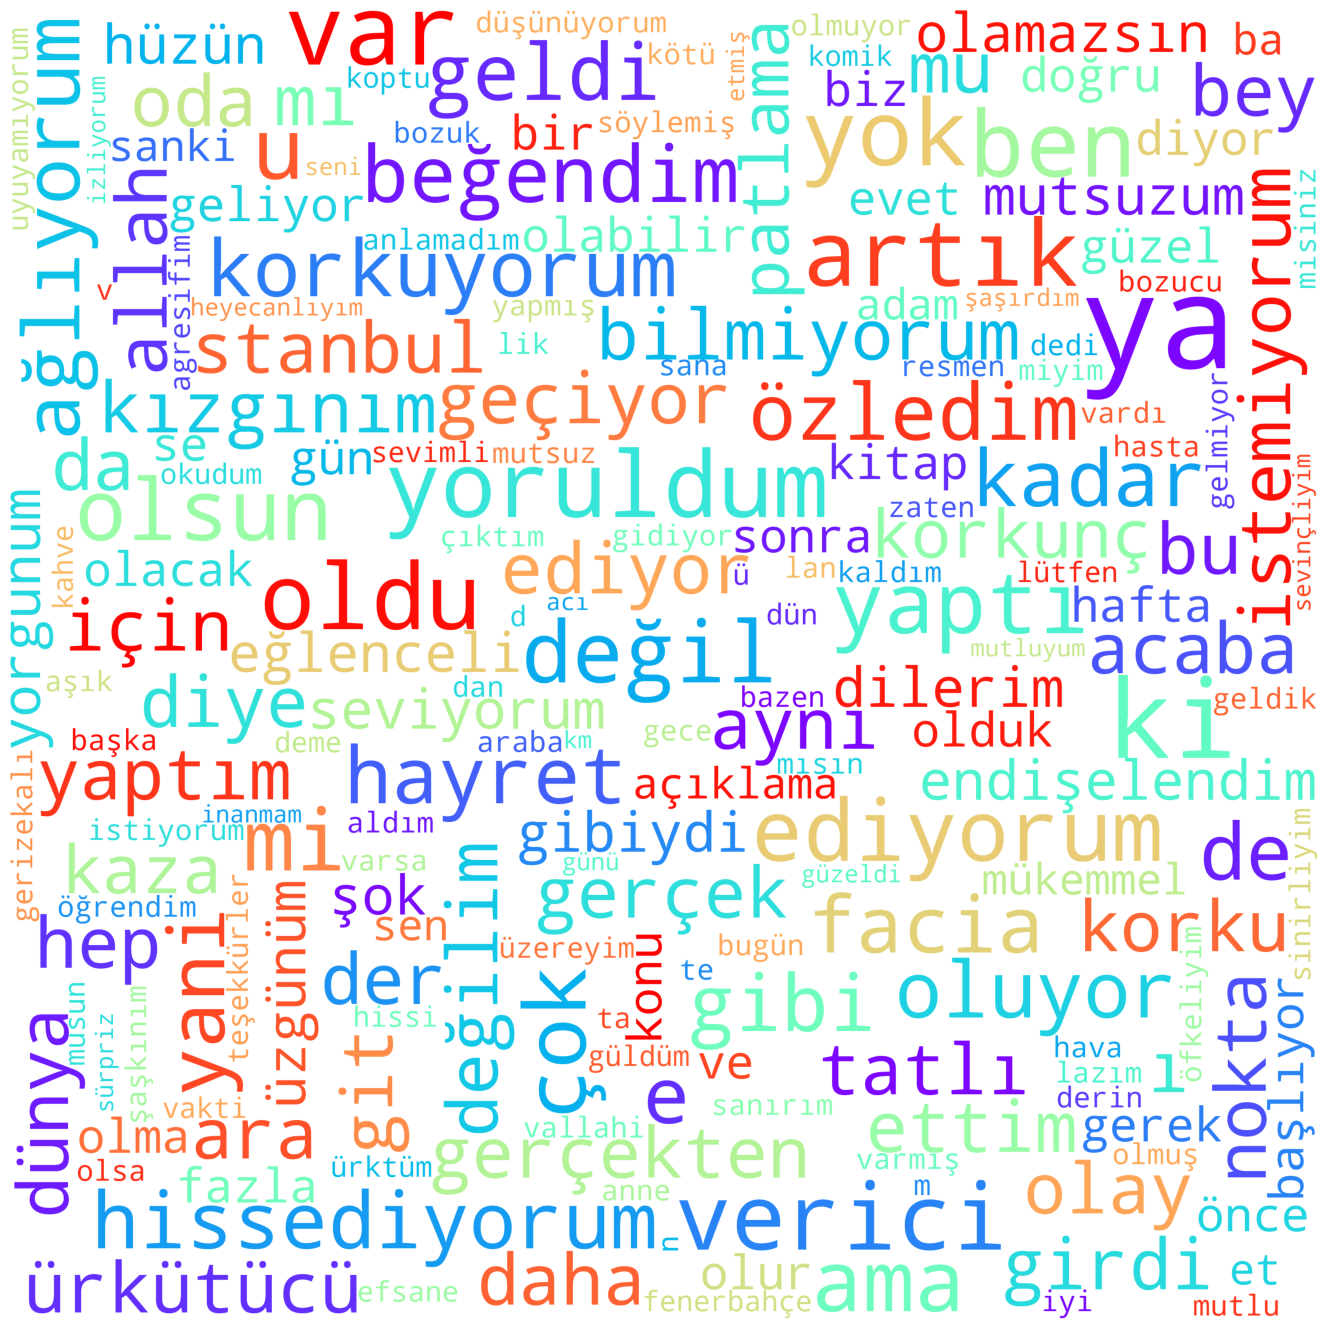

In [31]:
sentence = []
for i in words:
    sentence.append(i)
text = " ".join(map(str,sentence))

wordcloud = WordCloud(width=3000,height=3000, max_font_size=300, background_color="white",colormap="rainbow").generate(text)

plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation=None)
plt.axis("off")
plt.show()